In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

In [12]:
data = pd.read_csv('dog_rates_tweets.csv', parse_dates=['created_at'])

In [13]:
data = data[data['text'].str.contains(r'(\d+(\.\d+)?)/10')].copy()
data['rating'] = data['text'].str.extract(r'(\d+(?:\.\d+)?)/10')
data['rating'] = pd.to_numeric(data['rating'])

/var/folders/k6/29nmj8ks6kz11jdpq9m20xk40000gn/T/ipykernel_21506/629127877.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data = data[data['text'].str.contains(r'(\d+(\.\d+)?)/10')].copy()


In [14]:
data = data[data['rating']<=25]

In [15]:
def to_timestamp(x):
    return x.timestamp()

In [16]:
data['timestamp'] = data['created_at'].apply(to_timestamp)
#data['timestamp'] = to_timestamp(data['created_at'])

In [17]:
data

,id,created_at,text,rating,timestamp
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525935e+09
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525822e+09
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525760e+09
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525419e+09
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525310e+09
...,...,...,...,...,...
14885,1275493485085245440,2020-06-23 18:18:39+00:00,This is Ruth. She was spotted at a rally doing...,14.0,1.592936e+09
14895,1275102054608855040,2020-06-22 16:23:14+00:00,This is Narcos. He is very angry with you. The...,13.0,1.592843e+09
14896,1274821722584125442,2020-06-21 21:49:18+00:00,@PatrickKenneyMD omg i’d say 13/10 but i’d hat...,13.0,1.592776e+09
14906,1273774320519483392,2020-06-19 00:27:18+00:00,This is Oakley. He’s on his way home for the f...,12.0,1.592526e+09


In [18]:
fit = scipy.stats.linregress(data.timestamp, data.rating)
fit.slope, fit.intercept

(1.5002953343735724e-08, -10.59001653360649)

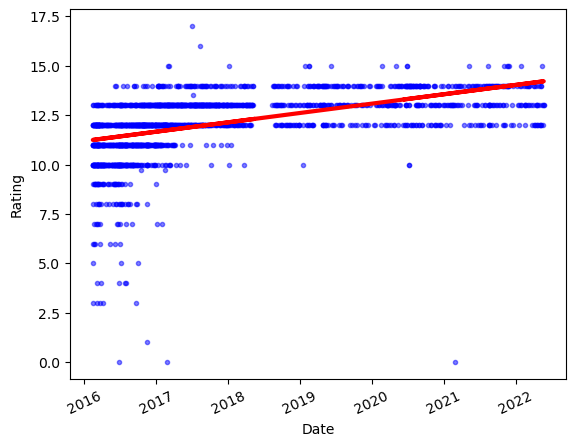

In [19]:
plt.xticks(rotation=25)
plt.plot(data['created_at'], data['rating'], 'b.', alpha=0.5)
plt.plot(data['created_at'], data['timestamp']*fit.slope + fit.intercept, 'r-', linewidth=3)
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()

In [20]:
data['prediction'] = data['timestamp']*fit.slope + fit.intercept
data

,id,created_at,text,rating,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525935e+09,12.303514
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525822e+09,12.301817
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525760e+09,12.300888
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525419e+09,12.295770
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525310e+09,12.294144
...,...,...,...,...,...,...
14885,1275493485085245440,2020-06-23 18:18:39+00:00,This is Ruth. She was spotted at a rally doing...,14.0,1.592936e+09,13.308733
14895,1275102054608855040,2020-06-22 16:23:14+00:00,This is Narcos. He is very angry with you. The...,13.0,1.592843e+09,13.307333
14896,1274821722584125442,2020-06-21 21:49:18+00:00,@PatrickKenneyMD omg i’d say 13/10 but i’d hat...,13.0,1.592776e+09,13.306330
14906,1273774320519483392,2020-06-19 00:27:18+00:00,This is Oakley. He’s on his way home for the f...,12.0,1.592526e+09,13.302583


In [21]:
fit.pvalue

2.536058725135737e-127

In [22]:
data['residuals'] = data['rating'] - data['prediction']
data['residuals']

2        1.696486
7        0.698183
8        1.699112
24       0.704230
30       0.705856
           ...   
14885    0.691267
14895   -0.307333
14896   -0.306330
14906   -1.302583
14917    0.698950
Name: residuals, Length: 2116, dtype: float64

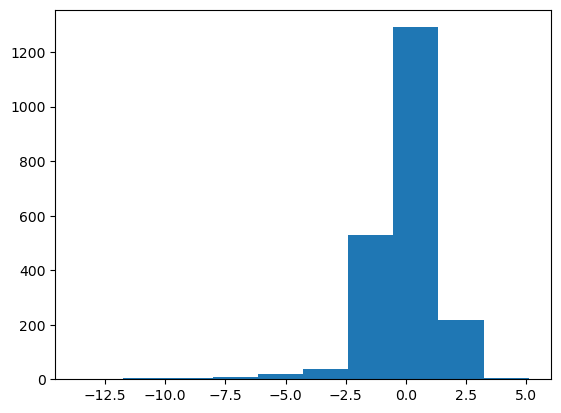

In [24]:
plt.hist(data['residuals'])
plt.show()